![Explanation for you <3](https://s3.us-east-2.amazonaws.com/journeynorth.org/images/graphics/mclass/Lat_Long.gif)

In [20]:
import json
import os
from matplotlib import pyplot as plt
import pandas as pd


In [21]:

# open all.json Update the image list from nasa
# os.system("wget -r https://epic.gsfc.nasa.gov/api/enhanced/all")
# os.rename("epic.gsfc.nasa.gov/api/enhanced/all", "epic.gsfc.nasa.gov/api/enhanced/all.json")


In [22]:

def contruct_date_list(): 
    dates = []
    with open("epic.gsfc.nasa.gov/api/enhanced/all.json") as f:
        data = json.load(f)
        for d in data:
            dates.append(d["date"])
    return dates

dates = contruct_date_list()
            
image_folders = []
# construct all image folder urls
for d in dates:
    image_folders.append(f"https://epic.gsfc.nasa.gov/api/enhanced/date/{d}")
print(len(image_folders))
print(len(dates))
print(image_folders[0])


13044
13044
https://epic.gsfc.nasa.gov/api/enhanced/date/2025-01-30


In [23]:
# PLEASE REMOVE DUPLICATES !!!!!111!!!11!1!1! Danger Below
# make all image folders
''' os.system("mkdir images")
for i in range(len(dates)):
    os.system(f"mkdir images/{dates[i]}")
    os.system(f"wget -P images/{dates[i]} {image_folders[i]}")
    os.system(f"mv images/{dates[i]}/{dates[i]} images/{dates[i]}/{dates[i]}.json") '''


' os.system("mkdir images")\nfor i in range(len(dates)):\n    os.system(f"mkdir images/{dates[i]}")\n    os.system(f"wget -P images/{dates[i]} {image_folders[i]}")\n    os.system(f"mv images/{dates[i]}/{dates[i]} images/{dates[i]}/{dates[i]}.json") '

In [24]:
folders = os.listdir("images")
folders.sort()
if ".DS_Store" in folders:
    folders.remove(".DS_Store")
len(folders)
for i in range(len(folders)):
    os.system(f"cp images/{folders[i]}/{folders[i]}.json combined")


In [25]:
files = os.listdir("combined")
if ".DS_Store" in files:
    files.remove(".DS_Store")

In [26]:
lat_coordinates = []
lon_coordinates = []
for i in range(len(files)):
    with open(f"combined/{files[i]}") as f:
        data = json.load(f)
        for p in range(len(data)):
            lat_coordinates.append(data[p]["centroid_coordinates"]["lat"])
            lon_coordinates.append(data[p]["centroid_coordinates"]["lon"])

        

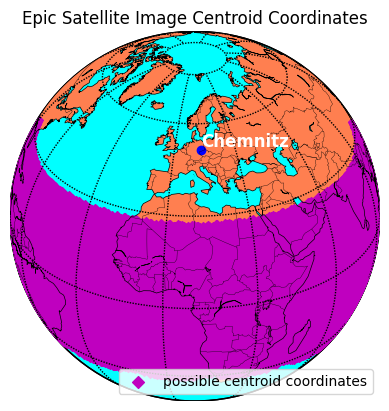

In [27]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# set up orthographic map projection with
# perspective of satellite looking down at 45N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho', lat_0=30, lon_0=10, resolution='c')

# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral', lake_color='aqua')

# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')

# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

# Plot lon and lat coordinates on the map. Somehow its lon first and then lat
x, y = map(lon_coordinates, lat_coordinates)
map.scatter(x, y, marker='D', color='m', label="possible centroid coordinates")

p, q = map(12.916667, 50.833332)
map.scatter(p, q, marker="o", color="b")

# Add label for the point p, q
plt.text(p, q, "Chemnitz", fontsize=12, ha='left', va='bottom', color='white', weight="bold")

# plot labels
plt.title("Epic Satellite Image Centroid Coordinates")
plt.legend()
plt.show()


In [28]:
df_lat = pd.DataFrame(lat_coordinates)
df_lon = pd.DataFrame(lon_coordinates)
print("lat describe: ")
print(df_lat.describe())
print("---------------")
print("lon describe: ")
print(df_lon.describe())

lat describe: 
                  0
count  39359.000000
mean       4.399146
std       16.958279
min      -29.274902
25%       -9.228516
50%        8.811035
75%       19.519043
max       26.770020
---------------
lon describe: 
                  0
count  39359.000000
mean       3.941364
std      101.847247
min     -179.963379
25%      -83.803711
50%        5.866699
75%       91.567383
max      180.000000


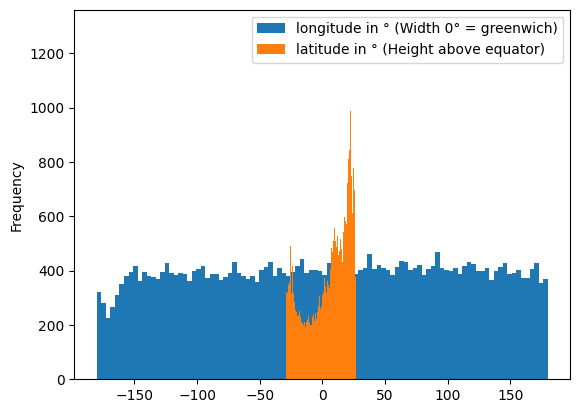

In [29]:
# make distribution of lat and lon
plt.hist(lon_coordinates, bins=100, label="longitude in ° (Width 0° = greenwich)")
plt.ylabel("Frequency")
plt.hist(lat_coordinates, bins=100, label="latitude in ° (Height above equator)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [30]:
import time
import datetime
import json
import os
import random
import numpy as np
import webbrowser
from PIL import Image
import matplotlib.pyplot as plt
from rich.progress import track
import subprocess
import pandas as pd
import torch
import torch.nn as nn
import torchvision
from torchvision.utils import save_image, make_grid
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchinfo import summary
from torch.utils.tensorboard import SummaryWriter

In [31]:
'''
# Prepare the images for appending the coordinates
for i in range(len(files)):
    with open(f"combined/{files[i]}") as f:
        data = json.load(f)
        for p in range(len(data)):
            # print(data[p]["image"] + ".png")
            lat_coordinates.append(data[p]["centroid_coordinates"]["lat"])
            lon_coordinates.append(data[p]["centroid_coordinates"]["lon"])
        for j in range(len(data)):
            image_name = data[j]["image"]
            lat = data[j]["centroid_coordinates"]["lat"]
            lon = data[j]["centroid_coordinates"]["lon"]
            new_image_name = f"{image_name}_{lat}_{lon}.png"
            os.system(f"cp download/earth/{image_name}.png pics_with_coords/all/{new_image_name}")'''

'\n# Prepare the images for appending the coordinates\nfor i in range(len(files)):\n    with open(f"combined/{files[i]}") as f:\n        data = json.load(f)\n        for p in range(len(data)):\n            # print(data[p]["image"] + ".png")\n            lat_coordinates.append(data[p]["centroid_coordinates"]["lat"])\n            lon_coordinates.append(data[p]["centroid_coordinates"]["lon"])\n        for j in range(len(data)):\n            image_name = data[j]["image"]\n            lat = data[j]["centroid_coordinates"]["lat"]\n            lon = data[j]["centroid_coordinates"]["lon"]\n            new_image_name = f"{image_name}_{lat}_{lon}.png"\n            os.system(f"cp download/earth/{image_name}.png pics_with_coords/all/{new_image_name}")'

In [32]:
from LocationRegressor import LocationRegressor

trans = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.Grayscale(),
        transforms.ToTensor()
    ])

model = LocationRegressor()
summary(model, input_size=(1, 1, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
LocationRegressor                        [1, 2]                    --
├─Sequential: 1-1                        [1, 2]                    --
│    └─Conv2d: 2-1                       [1, 64, 64, 64]           640
│    └─MaxPool2d: 2-2                    [1, 64, 16, 16]           --
│    └─Tanh: 2-3                         [1, 64, 16, 16]           --
│    └─Conv2d: 2-4                       [1, 128, 16, 16]          73,856
│    └─MaxPool2d: 2-5                    [1, 128, 4, 4]            --
│    └─Tanh: 2-6                         [1, 128, 4, 4]            --
│    └─Conv2d: 2-7                       [1, 256, 4, 4]            295,168
│    └─MaxPool2d: 2-8                    [1, 256, 1, 1]            --
│    └─Tanh: 2-9                         [1, 256, 1, 1]            --
│    └─Flatten: 2-10                     [1, 256]                  --
│    └─Linear: 2-11                      [1, 128]                  32,896
│

In [33]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.000001)

dataset = ImageFolder(root="pics_with_coords", transform=trans)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


15126.841796875
12724.3291015625
8780.5107421875
5575.8115234375
3094.201171875
1348.906982421875
12479.1083984375
223.5877685546875
11748.052734375
4931.22314453125
2624.1171875
10656.4794921875
11279.4951171875
2403.655517578125
536.3894653320312
1770.092041015625
15736.66015625
12142.3876953125
8300.2822265625
5188.0966796875
1153.432373046875
44.95843505859375
587.3070678710938
1859.53857421875
6594.677734375
10065.9912109375
1954.7100830078125
6774.3544921875
10262.255859375
15936.92578125
11485.4482421875
7746.251953125
4754.8193359375
2487.342041015625
952.2042846679688
147.454345703125
15652.6298828125
11241.7275390625
7553.55224609375
4603.08251953125
2377.60595703125
882.8128051757812
121.85889434814453
90.6646499633789
793.1378784179688
2223.6474609375
4382.48095703125
7278.14599609375
10901.119140625
2433.039306640625
4680.7646484375
7657.97314453125
11358.1015625
2164.30126953125
7179.9658203125
15513.43359375
11121.0927734375
7452.62158203125
4519.45654296875
2316.0205078

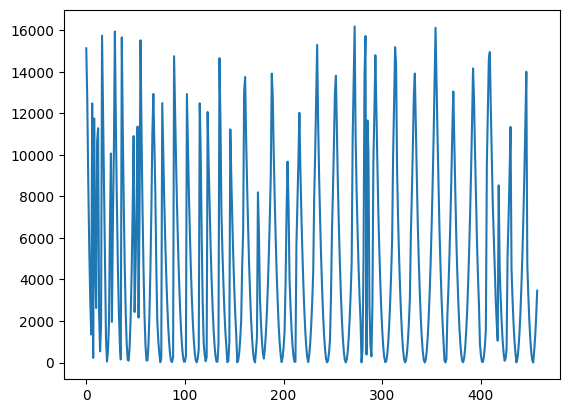

In [34]:

'''
# Test run to see if the model is working
for x, _ in dataloader:
    print(model(x).detach().numpy())
    # print coords of the image
    data_iter = iter(dataloader)
    data = next(data_iter)

    img = dataset.imgs[0]
    print(img)
    print("lat:", img[0].split("/")[-1].strip(".png").split("_")[-2], "lon:", img[0].split("/")[-1].strip(".png").split("_")[-1])
    break
'''

# 1. Pass image through model
# 2. Get the predicted lat and lon
# 3. Extract the actual lat and lon from the image name
# 4. Calculate the loss between the predicted and actual lat and lon
# 5. Backpropagate the loss
# 6. Update the weights
# 7. Repeat for all images
model = model.to("mps")

acc_list = []
# Training loop
for epoch in range(1):
    try:
        for i, (x, _) in enumerate(dataloader):
            try:
                for param in model.parameters():
                    param.grad = None
                x = x.to("mps")
                pred = model(x)
                lat = float(dataset.imgs[i][0].split("/")[-1].strip(".png").split("_")[-2])
                lon = float(dataset.imgs[i][0].split("/")[-1].strip(".png").split("_")[-1])
                loss = criterion(pred, torch.tensor([lat, lon]).to("mps"))
                loss.backward()
                optimizer.step()
                
                print(loss.item())
                acc_list.append(loss.item())
            except:
                pass
    except:
        pass       


plt.plot(acc_list)
plt.show()

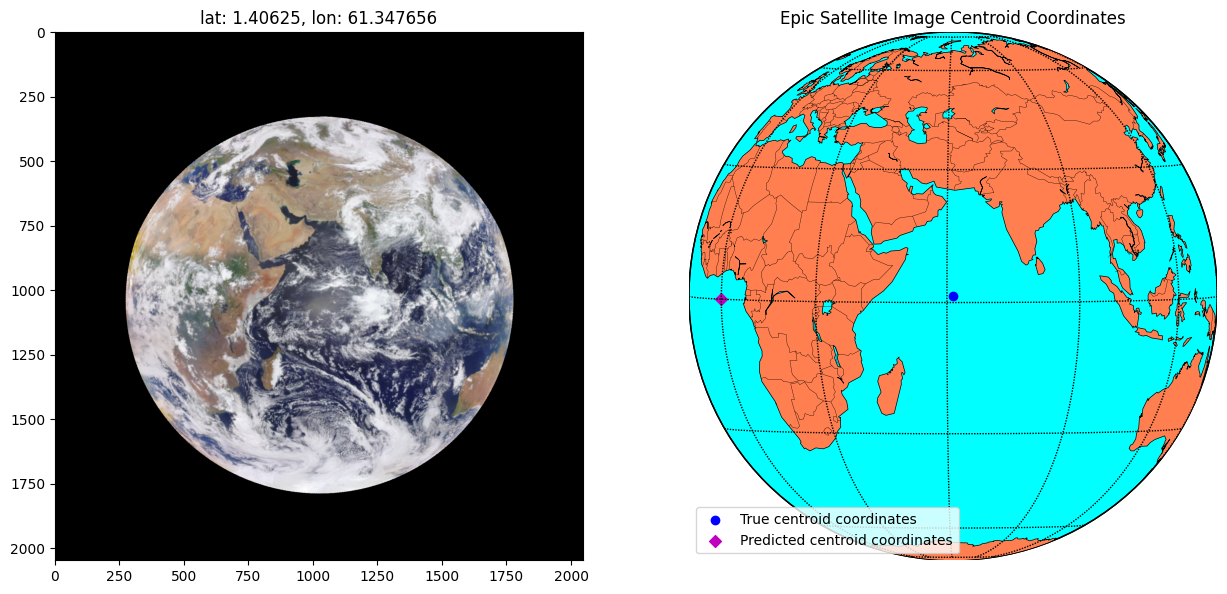

In [48]:
'''
# Model training
for epoch in range(10):
    for x, _ in dataloader:
        optimizer.zero_grad()
        y_pred = model(x)
        print(y_pred)
'''

img_num = random.randint(0, len(os.listdir("pics_with_coords/all")))

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Print image from pics_with_coords/all folder with coordinates
img_coords = os.listdir("pics_with_coords/all")
img = Image.open(f"pics_with_coords/all/{img_coords[img_num]}")
axs[0].imshow(img)
axs[0].set_title(f'lat: {img_coords[img_num].split("/")[-1].strip(".png").split("_")[-2]}, lon: {img_coords[img_num].split("/")[-1].strip(".png").split("_")[-1]}')

# set up orthographic map projection with
# perspective of satellite looking down at 45N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho', lat_0=float(img_coords[img_num].split("/")[-1].strip(".png").split("_")[-2]), lon_0=float(img_coords[img_num].split("/")[-1].strip(".png").split("_")[-1]), resolution='c', ax=axs[1])

# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral', lake_color='aqua')

# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')

# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

p, q = map(float(img_coords[img_num].split("/")[-1].strip(".png").split("_")[-1]), float(img_coords[img_num].split("/")[-1].strip(".png").split("_")[-2]))
map.scatter(p, q, marker="o", color="b", label="True centroid coordinates")

# Print models prediction
# Load the image using torchvision
img_tensor = trans(img).unsqueeze(0).to("mps")

# Get the model's prediction
model.eval()
with torch.no_grad():
    pred_coords = model(img_tensor).cpu().numpy().flatten()

p_pred, q_pred = map(pred_coords[1], pred_coords[0])
map.scatter(p_pred, q_pred, marker="D", color="m", label="Predicted centroid coordinates")

# plot labels
axs[1].set_title("Epic Satellite Image Centroid Coordinates")
plt.legend(loc='lower left')
plt.show()